# Topt Histogram

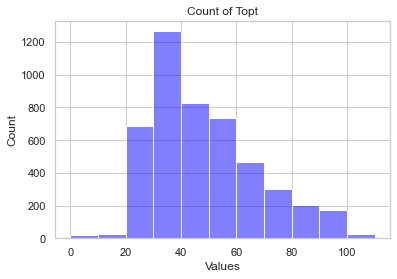

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ifeature_dataset = pd.read_csv('dataset/Topt_xlsx_2.csv')
ifeature_Topt = ifeature_dataset[['Topt']]

def histplot(final_df):
    fig=plt.figure()
    sns.set(style='whitegrid')
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

    sns.histplot(data=final_df, x='Topt', bins=bins, kde=False, color='blue', alpha=0.5)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title('Count of Topt')
    plt.show()
    fig.savefig('graph/histplot_Topt.svg',format='svg',dpi=300)#out put

histplot(ifeature_Topt)

# Scatter Plot and Pearson Correlation

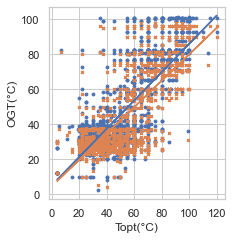

In [2]:
data = pd.read_csv('ML_data/Comparation_exp_datasets.csv')
data = data[['Topt', 'OGT_journal', 'OGT_cultivation']]

def scatter_plot(data):
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig = plt.figure(figsize=(8/2.54, 9/2.54))
    
    plt.rcParams['font.family'] = 'Arial'
    Topt = data['Topt']
    OGT_merge = data['OGT_journal']
    OGT_cultivation = data['OGT_cultivation']

    color = (131/255, 186/255, 220/255)
    point_size = 8
    
    plt.scatter(Topt, OGT_merge, label='OGT_journals', marker='o', s=point_size)
    plt.scatter(Topt, OGT_cultivation, label='OGT_cultivation', marker='x', s=point_size)
    
    corr_coef = np.corrcoef(Topt, OGT_merge)[0, 1]
    corr_label = f'Correlation (OGT_journals): {corr_coef:.2f}'
    plt.plot(Topt, np.poly1d(np.polyfit(Topt, OGT_merge, 1))(Topt), label=corr_label)

    corr_coef = np.corrcoef(Topt, OGT_cultivation)[0, 1]
    corr_label = f'Correlation (OGT_cultivation): {corr_coef:.2f}'
    plt.plot(Topt, np.poly1d(np.polyfit(Topt, OGT_cultivation, 1))(Topt), label=corr_label)

    plt.xlabel('Topt(°C)')
    plt.ylabel('OGT(°C)')

    x_ticks = [0, 20, 40, 60, 80, 100, 120]
    x_labels = ['0', '20', '40', '60', '80', '100', '120']
    plt.xticks(x_ticks, x_labels)

    y_ticks = [0, 20, 40, 60, 80, 100]
    y_labels = ['0', '20', '40', '60', '80', '100']
    plt.yticks(y_ticks, y_labels)

    fig.savefig('graph/scatter_Pearson.svg', format='svg', dpi=300)
    
scatter_plot(data)

# Coefficient of Determination Plot

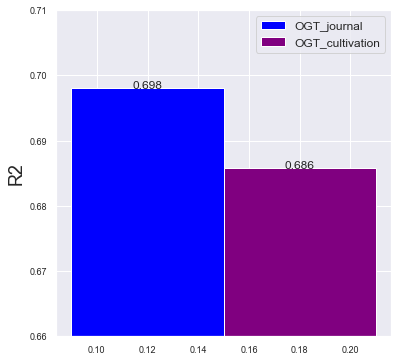

In [3]:
OGT_with_Topt_partially_corrected = [ 0.6980653052179835, 0.6857838279992232]

import pandas as pd
x = ['OGT_journal_test', 'OGT_cultivation_test']

data = {'OGT_with_Topt_partially_corrected':OGT_with_Topt_partially_corrected}
df = pd.DataFrame(data, index = x)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set()
 
x = df.columns
OGT_journal_test = df.iloc[0, :]
OGT_cultivation_test = df.iloc[1, :]

x_arange = np.arange(len(x)) 
bar_width = 0.3

plt.rcParams['figure.figsize'] = (6, 6)
fig = plt.figure()

ax2 = fig.add_subplot(111) 
ax2.set_ylim([0.66, 0.71])   

ax2.bar(x_arange+2*bar_width/5, OGT_journal_test, color='blue',width=bar_width/5,label="OGT_journal")
ax2.bar(x_arange+3*bar_width/5, OGT_cultivation_test, color='purple', width=bar_width/5,label="OGT_cultivation")

ax2.set_ylabel('R2',fontsize='18')
ax2.tick_params(color='black', labelsize=9)
for x, y2, y3 in zip(x_arange, OGT_journal_test, OGT_cultivation_test):
    plt.text(x+2*bar_width/5, y2, round(y2, 3), ha='center', fontsize=12)
    plt.text(x+3*bar_width/5, y3, round(y3, 3), ha='center', fontsize=12)
    
plt.legend(loc="upper right", fontsize=12)

# Violin Plot

### OGT dataset

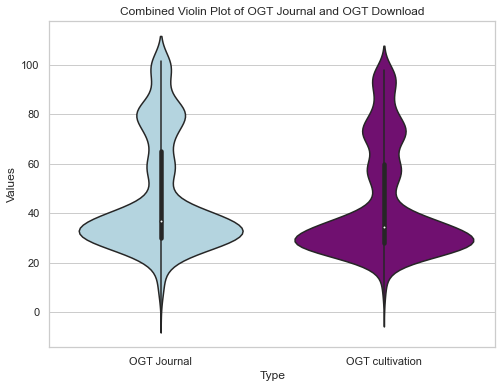

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ML_data/Comparation_exp_datasets.csv')
data = data[['Topt', 'OGT_journal', 'OGT_cultivation']]

OGT_journal = data['OGT_journal']
OGT_cultivation = data['OGT_cultivation']

df = pd.DataFrame({'Type': ['OGT Journal'] * len(OGT_journal) + ['OGT cultivation'] * len(OGT_cultivation),
                   'Values': list(OGT_journal) + list(OGT_cultivation)})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.violinplot(x='Type', y='Values', data=df, palette=['lightblue', 'purple'])
plt.title('Combined Violin Plot of OGT Journal and OGT Download')

plt.show()

### OGT predict dataset

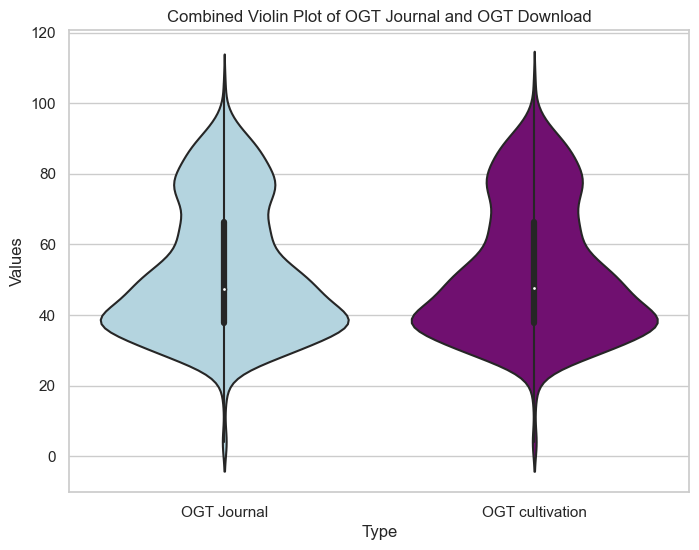

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

OGT_journal = pd.read_csv('ML_data/random_forest_Comparation_cultivation_data.csv')['y_pred']
OGT_cultivation = pd.read_csv('ML_data/random_forest_Comparation_journals_data.csv')['y_pred']

df = pd.DataFrame({'Type': ['OGT Journal'] * len(OGT_journal) + ['OGT cultivation'] * len(OGT_cultivation),
                   'Values': list(OGT_journal) + list(OGT_cultivation)})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.violinplot(x='Type', y='Values', data=df, palette=['lightblue', 'purple'])
plt.title('Combined Violin Plot of OGT Journal and OGT Download')
#plt.savefig('plot.svg', format='svg')

plt.show()

In [5]:
OGT_journal.head()

0    31.1875
1    36.2500
2    27.5000
3    30.0000
4    50.0000
Name: OGT_journal, dtype: float64

# Comparative Scatter Plot

D:\Users\captain\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


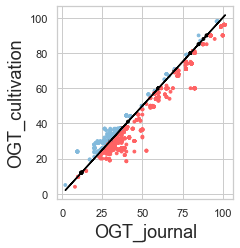

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

OGT_journal = data['OGT_journal']
OGT_cultivation = data['OGT_cultivation']

# Create a DataFrame containing two datasets
df = pd.DataFrame({'OGT Journal': OGT_journal, 'OGT cultivation': OGT_cultivation})

# color
a = (255/255, 99/255, 100/255)
b = (131/255, 186/255, 220/255)
c = 'black'
colors = [a if x > y else (b if x < y else c) for x, y in zip(OGT_journal, OGT_cultivation)]

# size
point_size = 8

plt.figure(figsize=(8/2.54, 9/2.54))
plt.ylabel('OGT_cultivation', fontsize='18')
plt.xlabel('OGT_journal', fontsize='18')

plt.scatter(OGT_journal, OGT_cultivation, label='scatter plot', color=colors, s=point_size, marker='o')
plt.plot(OGT_journal, OGT_journal, label='y=x', color='black', linestyle='-')